# Experiments
### Notebook to run experiments on the data supplied by the chair of functional materials at Saarland University

## Experiment: 
### Run RAFT optical flow model on the data
<font size="5"> 
In this experiment we will run the RAFT optical flow model on the data to see how well it performs compared to classical optical flow methods.
</font>

### Results:
<font size="5"> 
RAFT seems to fail completely on the data, this might be due to the fact that the data is not similar to the data the model was trained on.
</font>

In [13]:
import torch
from raft.utils import get_video_frames, plot_frames, preprocess

In [15]:
video_path = "videos/DoubleC-shape/double_c_shape.mp4"
frames = get_video_frames(video_path)

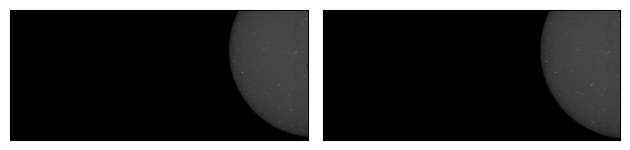

In [16]:
img_batch = torch.stack([frames[50], frames[51]])
plot_frames(img_batch)

In [18]:
from torchvision.models.optical_flow import raft_large
from torchvision.models.optical_flow.raft import Raft_Large_Weights

model = raft_large(weights=Raft_Large_Weights.C_T_V2)
model = model.eval()

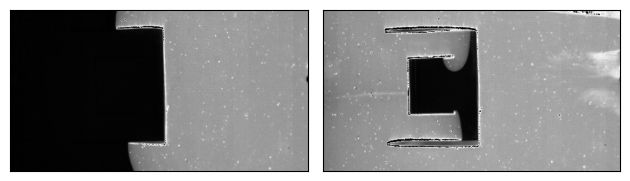

In [19]:
img1_batch: torch.Tensor = preprocess(torch.stack([frames[120], frames[200]]))
img2_batch: torch.Tensor = preprocess(torch.stack([frames[121], frames[201]]))

plot_frames(img1_batch)

In [20]:
predicted_flows: torch.Tensor = model(img1_batch, img2_batch)[-1]

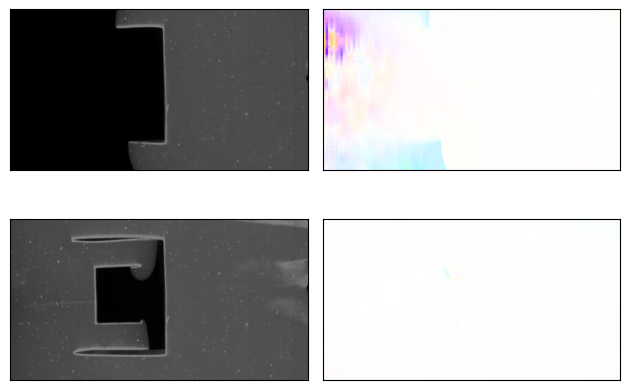

In [21]:
from torchvision.utils import flow_to_image
flow_images = flow_to_image(predicted_flows)

# The images have been mapped into [-1, 1] but for plotting we want them in [0, 1]
img1_batch = (img1_batch + 1.) / 2.

grid = [[img1, flow_img] for (img1, flow_img) in zip(img1_batch, flow_images)]
plot_frames(grid) 